In [7]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy.stats as stats

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier

In [11]:
cred=pd.read_csv("UCI_Credit_Card.csv") # read data
cred.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [13]:
cred.shape


(30000, 25)

In [15]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [16]:
cred=cred.rename(columns={'default.payment.next.month':'default'})
cred.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

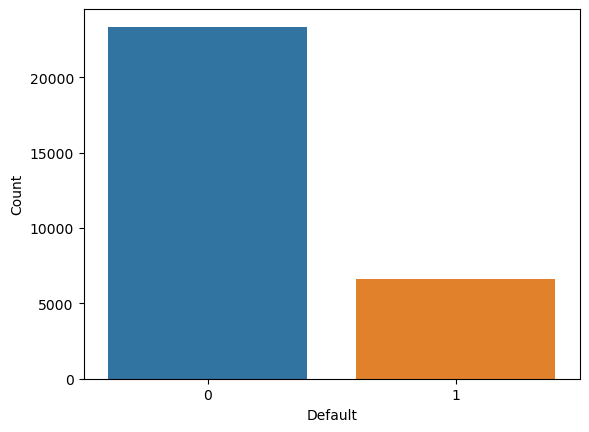

In [17]:
plt.figure(dpi=100)
sns.countplot(x="default", data=cred)
plt.xlabel("Default")
plt.ylabel("Count")
plt.show()


In [18]:
cred2=cred.copy()

In [19]:
def sex1(x):
    if (x==1):
        return "Male"
    else:
        return "Female"
cred2['SEX']=cred['SEX'].apply(sex1)

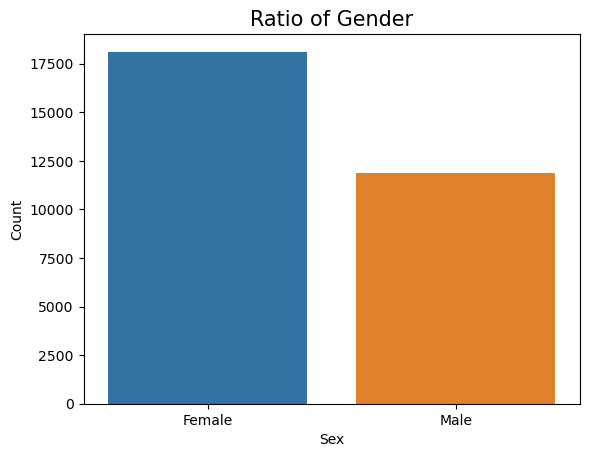

In [20]:
plt.figure(dpi=100)
cred2.SEX.value_counts()
sns.countplot(x="SEX", data=cred2)
plt.title("Ratio of Gender", size=15)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [21]:
cred2.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [24]:
def edu(x):
    if (x==0) or (x==5) or (x==6):
        x=4
    return x
cred['EDUCATION']=cred['EDUCATION'].apply(edu)
cred2['EDUCATION']=cred2['EDUCATION'].apply(edu)

In [25]:
def edu1(x):
    if (x==1):
        return "Graduate school"
    elif (x==2):
        return "University"
    elif (x==3):
        return "High School"
    else:
        return "Others"
cred2['EDUCATION']=cred2['EDUCATION'].apply(edu1)


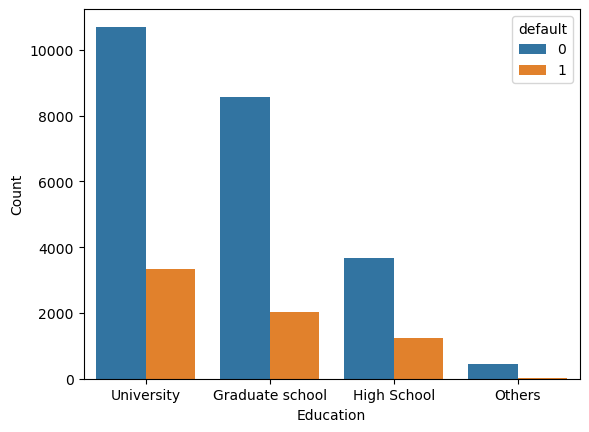

In [27]:
plt.figure(dpi=100)
cred2.EDUCATION.value_counts()
sns.countplot(x="EDUCATION", hue="default", data=cred2)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

In [28]:
cred.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [29]:
def marriage(x):
    if (x==0):
        x=3
    return x
cred['MARRIAGE']=cred['MARRIAGE'].apply(marriage)
cred2['MARRIAGE']=cred2['MARRIAGE'].apply(marriage)

In [30]:
def marriage1(x):
    if (x==1):
        return "Married"
    elif (x==2):
        return "Single"
    else:
        return "Others"
cred2['MARRIAGE']=cred2['MARRIAGE'].apply(marriage1)

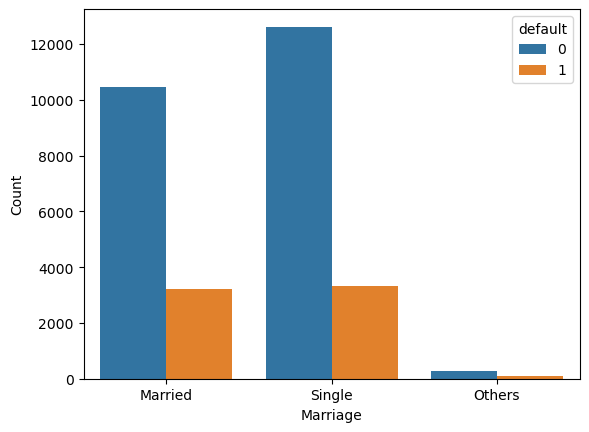

In [31]:
plt.figure(dpi=100)
cred2.MARRIAGE.value_counts()
sns.countplot(x="MARRIAGE", hue="default", data=cred2)
plt.xlabel("Marriage")
plt.ylabel("Count")
plt.show()

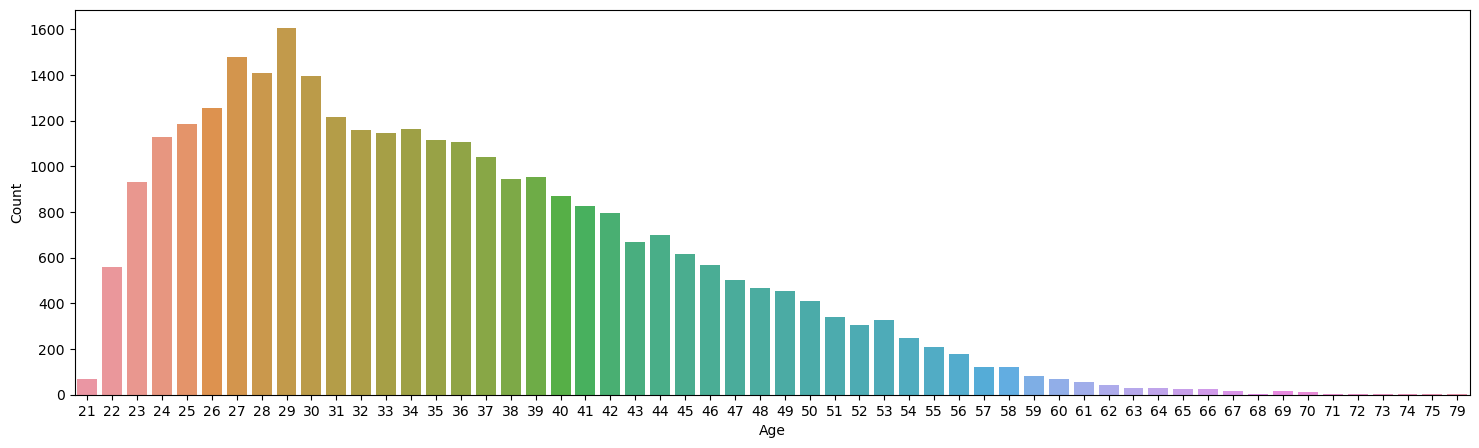

In [32]:
plt.figure(figsize=(18,5))
age=cred2['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=age,orient='v')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [33]:
# Dropping unnecessary column
cred.drop(['ID'], axis=1, inplace=True)


In [44]:
#Handling Outlier
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
cred=cred.apply(outlier_capping)
cred

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.000000,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.000000,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.000000,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.000000,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.000000,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.000000,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.000000,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,3,3,2,-1,0,...,20878.0,20582.0,19357.0,0.000000,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,66513.000918,3409.0,1178.0,1926.0,52964.0,1804.0,1


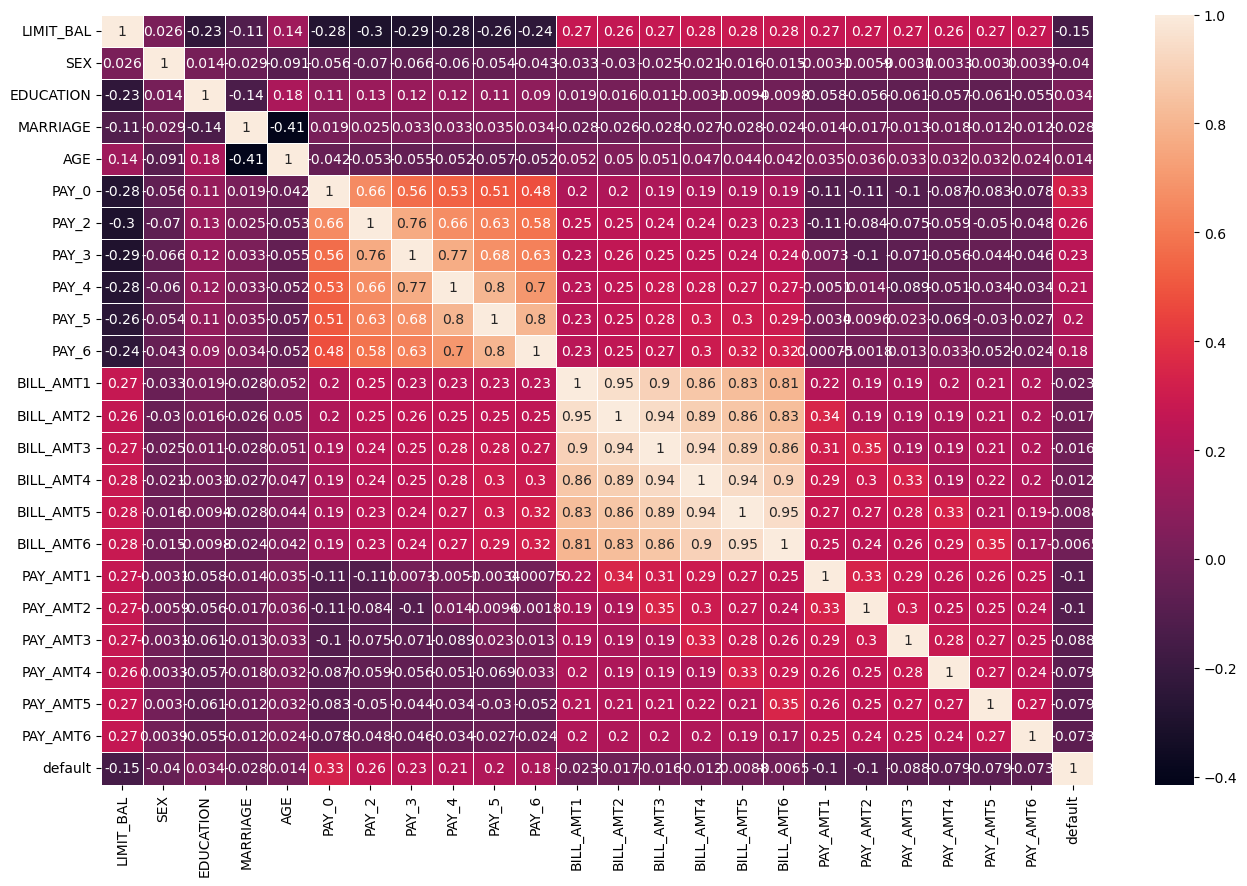

In [45]:
plt.figure (figsize= (16,10))
sns.heatmap(cred.corr(),linewidths=.5,annot=True)
plt.show()

In [37]:
# One-hot encoding
cred1=cred.copy()
cred1 = pd.get_dummies(cred1, columns=["SEX"])
cred1 = pd.get_dummies(cred1, columns=["EDUCATION"])
cred1 = pd.get_dummies(cred1, columns=["MARRIAGE"])
cred1

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,1,0,1,0,1,0,0,1,0,0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,1,0,1,0,1,0,0,0,1,0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,0,0,1,0,1,0,0,0,1,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,0,0,1,0,1,0,0,1,0,0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,...,0,1,0,0,0,1,0,1,0,0
29996,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,...,0,1,0,0,0,1,0,0,1,0
29997,30000.0,37,3,3,2,-1,0,0,3565.0,3356.0,...,1,1,0,0,1,0,0,0,1,0
29998,80000.0,41,1,-1,0,0,0,-1,-81.0,78379.0,...,1,1,0,0,0,1,0,1,0,0


In [38]:
target = cred1[['default']]
features = cred1.drop('default', axis=1)
data_final = pd.concat([features, target], axis=1)
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.3, random_state=123)

# Decision tree

In [39]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])})

In [40]:
tree.best_score_

0.8123333333333334

In [41]:
tree.best_params_

{'max_depth': 3, 'max_features': 4}

In [42]:
clf_tree = DecisionTreeClassifier( max_depth = 3, max_features=4, criterion='gini' )
train_X = train_X[train_X.columns.difference(['pred_prob'])]
test_X = test_X[test_X.columns.difference(['pred_prob'])]
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=3, max_features=4)

In [43]:
train_pred1 = clf_tree.predict(train_X)
test_pred1 = clf_tree.predict(test_X)

print(metrics.classification_report(train_y, train_pred1))
print('\nAccuracy Score for model3(training): ', accuracy_score(train_pred1, train_y))

print(metrics.classification_report(test_y, test_pred1))
print('\nAccuracy Score for model3(testing): ', accuracy_score(test_pred1, test_y))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     16312
           1       0.63      0.23      0.34      4688

    accuracy                           0.80     21000
   macro avg       0.72      0.60      0.61     21000
weighted avg       0.77      0.80      0.76     21000


Accuracy Score for model3(training):  0.7982380952380952
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7052
           1       0.58      0.23      0.33      1948

    accuracy                           0.80      9000
   macro avg       0.70      0.59      0.60      9000
weighted avg       0.77      0.80      0.76      9000


Accuracy Score for model3(testing):  0.7974444444444444


# Light gradient boosting

In [48]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report

params = {'objective': 'binary', 'metric': 'binary_logloss', 'boosting_type': 'gbdt'}


In [49]:
train_data = lgb.Dataset(train_X, label=train_y)


In [50]:
num_round = 10
lgbm = lgb.train(params, train_data, num_round)


[LightGBM] [Info] Number of positive: 4688, number of negative: 16312
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3202
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223238 -> initscore=-1.246895
[LightGBM] [Info] Start training from score -1.246895


In [52]:
pred_y = lgbm.predict(test_X)
pred_y = [1 if x >= 0.5 else 0 for x in pred_y]
print('Confusion Matrix:\n', confusion_matrix(test_y, pred_y))
print('Classification Report:\n', classification_report(test_y, pred_y))


Confusion Matrix:
 [[6795  257]
 [1333  615]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      7052
           1       0.71      0.32      0.44      1948

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.67      9000
weighted avg       0.81      0.82      0.80      9000



# Radom Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 10, max_features=4, n_jobs=-1)
radm_clf.fit( train_X, train_y )

train_pred5=radm_clf.predict(train_X)
test_pred5=radm_clf.predict(test_X)

In [54]:
print(metrics.classification_report(train_y, train_pred5))
print('\nAccuracy Score for model5(training): ', accuracy_score(train_pred5, train_y))

print(metrics.classification_report(test_y, test_pred5))
print('\nAccuracy Score for model5(testing): ', accuracy_score(test_pred5, test_y))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     16312
           1       0.85      0.45      0.59      4688

    accuracy                           0.86     21000
   macro avg       0.85      0.72      0.75     21000
weighted avg       0.86      0.86      0.84     21000


Accuracy Score for model5(training):  0.859904761904762
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7052
           1       0.66      0.36      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000


Accuracy Score for model5(testing):  0.8211111111111111


In [67]:
dt=accuracy_score(test_pred1, test_y)*100
rf=accuracy_score(test_pred5, test_y)*100

dt1=accuracy_score(train_pred1, train_y)*100
rf1=accuracy_score(train_pred5, train_y)*100

dict_train={"Decision Tree":dt1, "Random Forest":rf1}
dict_test={"Decision Tree":dt, "Random Forest":rf}

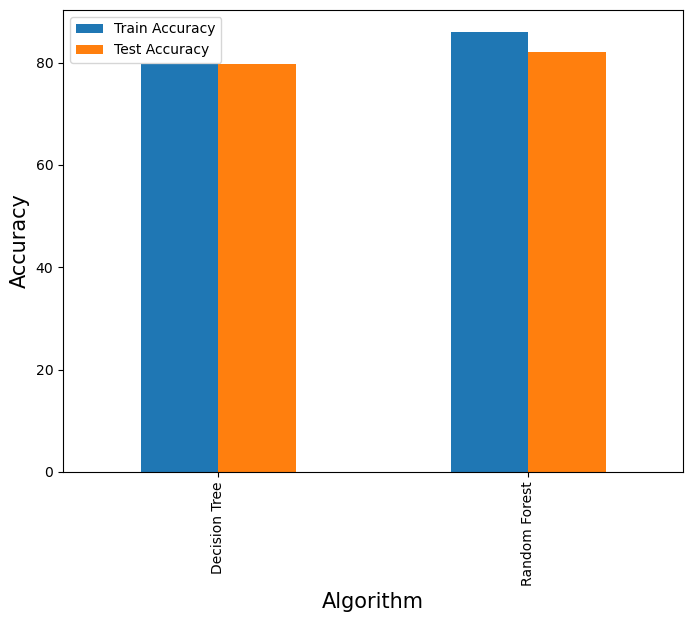

In [58]:
plot1=pd.DataFrame([dict_train,dict_test], index=['Train Accuracy','Test Accuracy']).transpose()

plot1.plot(kind='bar',figsize=(8,6))
plt.xlabel("Algorithm",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.show()

# Random forest (light gradient boosting)

In [80]:
import lightgbm as lgb

# create LightGBM datasets for training and testing
train_data = lgb.Dataset(train_X, label=train_y)
test_data = lgb.Dataset(test_X, label=test_y)


In [75]:
# set hyperparameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

In [76]:
# train the LightGBM model
lgb_model = lgb.train(params, train_data, 100)

# predict on training and testing data
train_pred6 = lgb_model.predict(train_X)
test_pred6 = lgb_model.predict(test_X)

In [77]:
# convert probabilities to binary predictions
train_pred6 = [1 if x >= 0.5 else 0 for x in train_pred6]
test_pred6 = [1 if x >= 0.5 else 0 for x in test_pred6]

In [78]:
# print classification report and accuracy score for training data
print(metrics.classification_report(train_y, train_pred6))
print('\nAccuracy Score for model6(training): ', accuracy_score(train_pred6, train_y))

# print classification report and accuracy score for testing data
print(metrics.classification_report(test_y, test_pred6))
print('\nAccuracy Score for model6(testing): ', accuracy_score(test_pred6, test_y))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     16312
           1       0.73      0.40      0.52      4688

    accuracy                           0.83     21000
   macro avg       0.79      0.68      0.71     21000
weighted avg       0.82      0.83      0.81     21000


Accuracy Score for model6(training):  0.832952380952381
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7052
           1       0.65      0.37      0.48      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000


Accuracy Score for model6(testing):  0.8213333333333334
